In [2]:
import os
import zipfile
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [3]:
# !wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip

In [10]:
url = "https://archive.ics.uci.edu/static/public/222/bank+marketing.zip"
zip_file_path = "bank_marketing.zip"
# Download the zip file
response = requests.get(url)
with open(zip_file_path, 'wb') as file:
    file.write(response.content)

In [3]:
df = pd.read_csv('C:\\Users\\Thobs\\Desktop\\Portfolio\\Projects\\Data-Science-Projects\\ml-zoomcamp-2024\\homeworks\\hw03\\bank_marketing_data\\bank\\bank.csv', delimiter=';')

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
wanted_cols = ['age', 'job', 'marital', 'education', 'balance', 'housing','contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

df_extracted = df[wanted_cols]
df_extracted.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'y'],
      dtype='object')

In [5]:
df_extracted.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
# Ques 1
df_extracted['education'].value_counts()

education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64

In [7]:
df_extracted['education'].mode()[0]

'secondary'

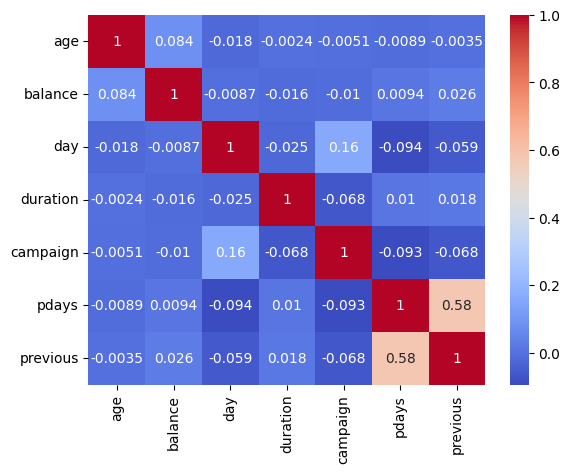

In [8]:
# Ques 2: 
df.dtypes
# lets get all the numerical columns and calculate a correlation between them
numerical_columns = df_extracted.select_dtypes(include=[np.number]).columns
correlation_matrix = df_extracted[numerical_columns].corr()
correlation_matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [9]:
# Ques 3
X = df.drop('y',axis =1)
y = df['y']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [10]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [12]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

In [13]:
X_train.shape, X_val.shape, X_test.shape

((2712, 16), (904, 16), (905, 16))

In [14]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
3982,41,management,married,tertiary,no,72,yes,no,unknown,7,may,764,3,-1,0,unknown
1182,38,management,married,tertiary,no,126,yes,no,unknown,21,may,164,2,-1,0,unknown
1307,41,blue-collar,married,secondary,no,1459,no,no,unknown,5,jun,82,1,-1,0,unknown
4264,57,services,married,secondary,no,162,yes,no,unknown,5,may,174,1,-1,0,unknown
1505,30,admin.,married,secondary,no,124,no,no,telephone,16,jun,161,2,-1,0,unknown


In [15]:
from sklearn.metrics import mutual_info_score

categorical_columns = X_train.select_dtypes(include=['object']).columns.tolist()
mi_scores = {}
for col in categorical_columns:
    # calculate the mutual information score of col with target 'y'
    mi = mutual_info_score(X_train[col], y_train)
    # store the score in the dictionary and sort them in descending order
    mi_scores[col] = round(mi, 2)
    mi_scores = {k: v for k, v in sorted(mi_scores.items(), key=lambda item: item[1], reverse=True)}
    print(f"{col}: {mi}")

job: 0.00935598242626225
marital: 0.0024460091757719793
education: 0.0015593737937158077
default: 0.00019940635018957098
housing: 0.007328989671589334
loan: 0.0011731505748807103
contact: 0.011582979874887586
month: 0.022095467518456785
poutcome: 0.030354512677971873


In [16]:
mi_scores

{'poutcome': np.float64(0.03),
 'month': np.float64(0.02),
 'job': np.float64(0.01),
 'housing': np.float64(0.01),
 'contact': np.float64(0.01),
 'marital': np.float64(0.0),
 'education': np.float64(0.0),
 'default': np.float64(0.0),
 'loan': np.float64(0.0)}

In [36]:
# Ques 4
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
dv = DictVectorizer(sparse=False)

train_dict = X_train[categorical_columns].to_dict(orient='records')
X_train_encoded = dv.fit_transform(train_dict)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train_encoded, y_train)

test_dict = X_test[categorical_columns].to_dict(orient='records')
X_test_encoded = dv.transform(test_dict)

val_dict = X_val[categorical_columns].to_dict(orient='records')
X_val_encoded = dv.transform(val_dict)

y_pred = model.predict(X_val_encoded)

accuracy = accuracy_score(y_val, y_pred)
print(round(accuracy, 2))


0.87


In [37]:
# Ques 5
#Let's find the least useful feature using the feature elimination technique.

from sklearn.feature_selection import RFE

selector = RFE(estimator=LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42), n_features_to_select=10)
selector.fit(X_train_encoded, y_train)
selector.get_support()
selector.ranking_
# lets get the fefatures that are important the selected ones

X_train_encoded_selected = X_train_encoded[:, selector.support_]
X_val_encoded_selected = X_val_encoded[:, selector.support_]

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train_encoded_selected, y_train)

y_pred = model.predict(X_val_encoded_selected)

accuracy = accuracy_score(y_val, y_pred)
print(round(accuracy, 2))

0.88


In [38]:
X_train_encoded.shape

(2712, 44)

In [40]:
# Now exclude each feature from the train set and train a model without it. Record the accuracy for each model

accuracies = []
for i in range(X_train_encoded.shape[1]):
    X_train_encoded_reduced = np.delete(X_train_encoded, i, axis=1)
    X_val_encoded_reduced = np.delete(X_val_encoded, i, axis=1)
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train_encoded_reduced, y_train)
    y_pred = model.predict(X_val_encoded_reduced)
    accuracy = accuracy_score(y_val, y_pred)
    accuracies.append(accuracy)
    print(f"Accuracy without feature {i}: {accuracy}")


differences = [acc - accuracies[i] for i, acc in enumerate(accuracies)]

# Find the feature with the lowest difference.

feature_to_drop = np.argmax(differences)
feature_to_drop = X_train.columns[feature_to_drop]
print(f"Feature to drop: {feature_to_drop}")


Accuracy without feature 0: 0.8727876106194691
Accuracy without feature 1: 0.8727876106194691
Accuracy without feature 2: 0.8727876106194691
Accuracy without feature 3: 0.8727876106194691
Accuracy without feature 4: 0.8727876106194691
Accuracy without feature 5: 0.8727876106194691
Accuracy without feature 6: 0.8727876106194691
Accuracy without feature 7: 0.8727876106194691
Accuracy without feature 8: 0.8738938053097345
Accuracy without feature 9: 0.8727876106194691
Accuracy without feature 10: 0.8727876106194691
Accuracy without feature 11: 0.8727876106194691
Accuracy without feature 12: 0.8727876106194691
Accuracy without feature 13: 0.8727876106194691
Accuracy without feature 14: 0.8727876106194691
Accuracy without feature 15: 0.8727876106194691
Accuracy without feature 16: 0.8738938053097345
Accuracy without feature 17: 0.8727876106194691
Accuracy without feature 18: 0.8727876106194691
Accuracy without feature 19: 0.8727876106194691
Accuracy without feature 20: 0.8761061946902655
Ac

In [47]:
# Ques 6

c_values = [0.01, 0.1, 1, 10, 100]
accuracies = []
acc_dict = {}
for c in c_values:
    model = LogisticRegression(solver='liblinear', C=c, max_iter=1000, random_state=42)
    model.fit(X_train_encoded, y_train)
    y_pred = model.predict(X_val_encoded)
    accuracy = accuracy_score(y_val, y_pred)
    accuracies.append(round(accuracy,3))
    acc_dict[c] = round(accuracy,3)
    print(f"C: {c}, Accuracy: {round(accuracy,3)}")

C: 0.01, Accuracy: 0.872
C: 0.1, Accuracy: 0.879
C: 1, Accuracy: 0.873
C: 10, Accuracy: 0.873
C: 100, Accuracy: 0.872
